## **Mount Google Drive to Store Files and Data**

In [1]:
# Berikut adalah link yang dapat Anda set dalam kode program Anda. Anda dapat mendownload dataset yang Anda butuhkan melalui link berikut:
# Link 1000 images: https://www.dropbox.com/s/c0yfe4bpt0orb0m/paintings1k.zip?dl=1
# Link 5000 images: https://www.dropbox.com/s/yhu8v2yhft70doh/paintings5k.zip?dl=1
# Link 10000 images: https://www.dropbox.com/s/16jrkfrdm0c543q/paintings15k.zip?dl=1

# File yang terdownload akan dalam format .zip. Silakan disimpan di direktori Anda.

In [2]:
# Gunakan fungsi ini jika Anda menjalankan kode program pada google collab dan menggunakan google drive untuk menyimpan file.

from google.colab import drive
drive.mount('/content/drive')

# Jika Anda menjalankan pada komputer Anda, abaikan blok program ini.

Mounted at /content/drive


Saya menghubungkan Google Drive agar dapat mengakses dataset dan juga menyimpan model hasil training langsung ke Drive.

## **1) Importing Python Packages for GAN**


In [3]:
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D, Dense, Conv2DTranspose
from keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import numpy as np
!mkdir generated_images resized_images

Saya mengimpor library Keras yang diperlukan untuk membangun model GAN, kemudian membuat dua folder:

generated_images untuk hasil gambar dari generator

resized_images untuk dataset yang sudah diubah ukurannya.

In [4]:
# Unzip the-zip-file -d name-of-destination-folder
# the-zip-file: path dari folder sumber data yang akan Anda gunakan.
# name-of-destination-folder: nama folder yang tempat hasil file yang akan di unzip disimpan.
# Contoh: !unzip /content/drive/MyDrive/paintings1k.zip -d 5kImage

In [5]:
!unzip /content/drive/MyDrive/paintings1k.zip -d 5kImage

Archive:  /content/drive/MyDrive/paintings1k.zip
  inflating: 5kImage/000e1fa33ba1ffd07953c3de9898e5e1c.jpg  
  inflating: 5kImage/00afb8e719aa2ea716a5b6a54c5c55fbc.jpg  
  inflating: 5kImage/00bd05a5d525f451228196e47d51e243c.jpg  
  inflating: 5kImage/00c4203c603bf46957ad9030f6712e9ac.jpg  
  inflating: 5kImage/00c775299a9b11d6a4d310a1464d7493c.jpg  
  inflating: 5kImage/00ca56f16c0bae52185ea31f95f0484cc.jpg  
  inflating: 5kImage/00d0e9ea9c51e85b92133b019430adf8c.jpg  
  inflating: 5kImage/00d4fe0ff5de4ae04334c8c3a3a0147dc.jpg  
  inflating: 5kImage/00d643034afe01ab875b817dc5de3af5c.jpg  
  inflating: 5kImage/00dc0126ea387c24bf4a401686134308c.jpg  
  inflating: 5kImage/00e5b91aabf7e4e3ba4cad53468780fdc.jpg  
  inflating: 5kImage/00e9ac0943d8f07ddedf04408580769ac.jpg  
  inflating: 5kImage/00e9d6ab120d2758103a71ccff104a1ac.jpg  
  inflating: 5kImage/00e24bd88ccabec5dcecfbe97a9d14a7c.jpg  
  inflating: 5kImage/00edb80f98dafc917737382c3c6ef6b1c.jpg  
  inflating: 5kImage/00f96cc7d4d9068

In [6]:
# Isi bagian didalam tanda "" dengan alamat path dari image yang akan Anda gunakan.
# Hint: klik kanan pada folder yang Anda tuju, kemudian pilih copy-path.
# Contoh: /content/drive/5kImage

images_path = "/content/5kImage/"

Saya mengekstrak dataset lukisan dari Google Drive ke folder 5kImage dan menyimpan path-nya ke variabel images_path agar mudah dipanggil.

## **Resizing Data to match Neural Network Input**

In [7]:
import os
# from PIL import Image
import cv2
reshape_size = (64,64)

i = 0
for image in os.listdir(images_path):
  # print(image)
  img = cv2.imread(images_path + image)
  img = cv2.resize(img, reshape_size)
  cv2.imwrite("resized_images/%d.png" % i,img)
  # print(img.shape)
  i = i+1

Saya memuat semua gambar dalam folder dataset, mengubah ukurannya menjadi 64x64 piksel, dan menyimpannya ke dalam folder resized_images.
Langkah ini penting agar semua data memiliki dimensi seragam saat diproses oleh model.

## **2) Parameters for Neural Networks & Data**

In [8]:
img_width = 64
img_height = 64
channels = 3
img_shape = (img_width, img_height, channels)
latent_dim = 100
adam = Adam(learning_rate=0.0002)

Saya mendefinisikan ukuran gambar, jumlah kanal warna (RGB = 3), dan ukuran ruang laten sebesar 100.
Saya juga memilih optimizer Adam dengan learning rate 0.0002 untuk stabilitas training.

## **3) Building Generator**





In [9]:
def build_generator():
    model = Sequential()
    model.add(Dense(256 * 8* 8, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8,8,256)))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))

    model.summary()

    return model

generator = build_generator()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16384)          │     1,654,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,707,203 (10.33 MB)

 Trainable params: 2,707,203 (10.33 MB)

 Non-trainable params: 0 (0.00 B)

Saya membangun generator, yaitu model yang menghasilkan gambar dari noise acak berdimensi 100.
Model ini memperbesar data secara bertahap dari 8×8 hingga 64×64 piksel menggunakan Conv2DTranspose.
Aktivasi tanh membuat hasil output berada di rentang nilai [-1, 1].

## **4) Building Discriminator**

In [10]:
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, (3,3), padding='same', input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3), padding='same', ))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()
    return model

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1048576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1048576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │     1,048,577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,566,977 (5.98 MB)

 Trainable params: 1,566,977 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

Saya membangun discriminator, yaitu model yang bertugas membedakan antara gambar asli dan gambar palsu.
Ia menggunakan beberapa lapisan konvolusi dan dropout untuk mengurangi overfitting.
Output-nya satu neuron sigmoid yang menghasilkan nilai 0 (palsu) atau 1 (asli).

## **5) Connecting Neural Networks to build GAN**

In [11]:
GAN = Sequential()
discriminator.trainable = False
GAN.add(generator)
GAN.add(discriminator)

GAN.compile(loss='binary_crossentropy', optimizer=adam)

Saya membuat model GAN gabungan dengan menyusun generator dan discriminator secara berurutan.
Parameter discriminator dibekukan sementara agar tidak ikut diperbarui saat melatih generator.
Tujuan model ini adalah mengajarkan generator membuat gambar yang mampu “menipu” discriminator.

In [12]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16384)          │     1,654,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,707,203 (10.33 MB)

 Trainable params: 2,707,203 (10.33 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1048576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1048576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │     1,048,577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,566,977 (5.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,566,977 (5.98 MB)

## **6) Outputting Images**


In [14]:
import matplotlib.pyplot as plt
import glob
import imageio
import PIL

save_name = 0.00000000

def save_imgs(epoch):
    r, c = 4, 4
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)
    global save_name
    save_name += 0.00000001

    # Rescale images 0 - 1
    gen_imgs = (gen_imgs + 1) / 2.0

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("currentgeneration.png")
    fig.savefig("generated_images/%.8f.png" % save_name)
    plt.close()

Saya membuat fungsi untuk menyimpan hasil gambar dari generator setiap kali dipanggil.
Gambar dihasilkan dari noise acak, lalu disimpan baik dalam file terkini (currentgeneration.png) maupun di folder generated_images untuk dokumentasi perkembangan training.

## **7) Training GAN**

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import cv2

latent_dim = 100  # Define latent dimension

# Fungsi untuk load dataset hasil resize
def load_images_from_folder(folder):
    data = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = cv2.imread(path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img.astype('float32')
            data.append(img)
    data = np.array(data)
    data = data / 127.5 - 1.0  # Normalisasi ke [-1, 1]
    return data

def train(epochs, batch_size=32, save_interval=200):
    X_train = load_images_from_folder("resized_images/")
    print("Dataset shape:", X_train.shape)

    bat_per_epo = int(X_train.shape[0] / batch_size)
    valid = np.ones((batch_size, 1))
    fakes = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        for j in range(bat_per_epo):
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            gen_imgs = generator.predict(noise)

            # Train discriminator
            d_loss_real = discriminator.train_on_batch(imgs, valid)
            d_loss_fake = discriminator.train_on_batch(gen_imgs, fakes)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train generator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            g_loss = GAN.train_on_batch(noise, valid)

            print("Epoch: %d Batch: %d [D loss: %f, acc: %.2f%%] [G loss: %f]" %
                  (epoch, j, d_loss[0], 100 * d_loss[1], g_loss))

        if epoch % save_interval == 0:
            generator.save(f"generator_epoch_{epoch}.h5")  # Save model at intervals

# Jalankan training
train(100, batch_size=32, save_interval=200)


Dataset shape: (1274, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch: 0 Batch: 0 [D loss: 0.663188, acc: 75.78%] [G loss: 0.692776]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch: 0 Batch: 1 [D loss: 0.667554, acc: 58.33%] [G loss: 0.692512]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch: 0 Batch: 2 [D loss: 0.669468, acc: 54.43%] [G loss: 0.692179]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch: 0 Batch: 3 [D loss: 0.670421, acc: 53.15%] [G loss: 0.691777]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch: 0 Batch: 4 [D loss: 0.670446, acc: 52.45%] [G loss: 0.691295]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch: 0 Batch: 5 [D loss: 0.670799, acc: 52.00%] [G loss: 0.690777]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch: 0 Batch: 6 [D loss: 0.670919, acc: 51.69%] [G loss: 0.690188]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Epoch: 0 Batch: 7 [D loss: 0.670640, acc: 51.46%] [G loss: 0.689427]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Epoch: 0 Batch: 8 [D loss: 0.671169, acc: 51.29%] [G loss: 0.688529]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch: 0 Batch: 9 [D loss: 0.671718, 

Output streaming akan dipotong hingga 5000 baris terakhir.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Epoch: 35 Batch: 35 [D loss: 1.192414, acc: 49.30%] [G loss: 0.205623]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch: 35 Batch: 36 [D loss: 1.192474, acc: 49.30%] [G loss: 0.205591]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch: 35 Batch: 37 [D loss: 1.192542, acc: 49.30%] [G loss: 0.205557]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch: 35 Batch: 38 [D loss: 1.192608, acc: 49.30%] [G loss: 0.205525]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Epoch: 36 Batch: 0 [D loss: 1.192674, acc: 49.29%] [G loss: 0.205490]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Epoch: 36 Batch: 1 [D loss: 1.192737, acc: 49.30%] [G loss: 0.205458]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Epoch: 36 Batch: 2 [D loss: 1.192802, acc: 49.30%] [G loss: 0.205424]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch: 36 Batch: 3 [D loss: 1.192865, acc: 49.30%] [G loss: 0.205393]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch: 36 Batch: 4 [D loss: 1.19292

Fungsi load saya gunakan untuk memuat semua gambar yang sudah diresize ke memori dan menormalisasinya ke rentang [-1, 1] agar sesuai dengan output tanh pada generator.

Saya membuat fungsi pelatihan GAN.

Pertama, saya memuat dataset hasil resize.

Lalu, pada setiap epoch, saya melatih discriminator untuk membedakan gambar asli dan palsu.

Setelah itu, saya melatih generator agar dapat menipu discriminator.
Setiap beberapa interval, model generator saya simpan agar tidak kehilangan progres.

In [22]:
noise = np.random.normal(0, 1, (16, latent_dim))
gen_imgs = generator.predict(noise)
gen_imgs = (gen_imgs + 1) / 2.0
# plt.imshow(gen_imgs[2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


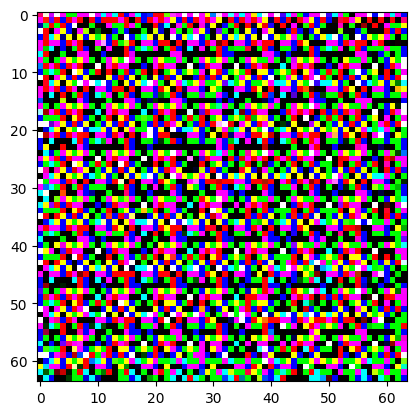

In [23]:
plt.imshow(gen_imgs[6])

In [36]:
generator.save_weights("/content/generator1hour.weights.h5")
discriminator.save_weights("/content/discriminator1hour.weights.h5")


Saya menyimpan bobot (weights) dari kedua model agar bisa digunakan kembali tanpa perlu melakukan training ulang.

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saya memasang kembali Google Drive untuk memastikan hasil model bisa disalin ke Drive jika diperlukan.

### **8) Making GIF**

In [38]:
# Display a single image using the epoch number
# def display_image(epoch_no):
#   return PIL.Image.open('generated_images/%.8f.png'.format(epoch_no))

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('generated_images/*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)

  if filenames:  # Check if filenames is not empty
    image = imageio.imread(filenames[-1])
    writer.append_data(image)

Bagian terakhir ini saya gunakan untuk membuat animasi GIF yang menampilkan evolusi hasil generator dari waktu ke waktu selama proses training.
Setiap gambar yang disimpan di generated_images akan digabungkan menjadi satu file dcgan.gif.